In [1]:
import pandas as pd
import numpy as np

In [11]:
df_5 = pd.read_csv('avian_activity_5_basamba.csv', sep=';')
df_6 = pd.read_csv('avian_activity_6_basamba.csv', sep=';')
df_11 = pd.read_csv('avian_activity_11_basamba.csv', sep=';')

In [27]:
# concatenating df1 and df2 along rows
df = pd.concat([df_5, df_6,df_11], axis=0)

In [29]:
print(df..to_string())

,Date,file,Day,Month,Year,Hour,Minute,Second,TFSD_avian,TFSD_human
0,27/05/2022 00:40,Basamba\SWIFT 02_20220527_004000.wav,27,5,2022,0,40,0,0.51,0.39
1,27/05/2022 00:40,Basamba\SWIFT13_20220527_004000.wav,27,5,2022,0,40,0,0.40,0.32
2,27/05/2022 00:40,Basamba\SWIFT14_20220527_004000.wav,27,5,2022,0,40,0,0.50,0.20
3,27/05/2022 00:40,Basamba\SWIFT7_20220527_004000.wav,27,5,2022,0,40,0,0.34,0.43
4,27/05/2022 00:40,Basamba\SWIFT9_20220527_004000.wav,27,5,2022,0,40,0,0.39,0.31
...,...,...,...,...,...,...,...,...,...,...
224,2022-11-30 22:40:00,Basamba\SWIFT11_20221130_224000.wav,30,11,2022,22,40,0,0.09,0.87
225,2022-11-30 22:40:00,Basamba\SWIFT6_20221130_224000.wav,30,11,2022,22,40,0,0.06,0.90
226,2022-11-30 22:40:00,Basamba\SWIFT 02_20221130_224000.wav,30,11,2022,22,40,0,0.09,0.86
227,2022-11-30 22:40:00,Basamba\SWIFT8_20221130_224000.wav,30,11,2022,22,40,0,0.17,0.73


In [33]:
df.loc[df['Month'] == 5, 'Month'] = 'May'
df.loc[df['Month'] == 6, 'Month'] = 'Jun'
df.loc[df['Month'] == 11, 'Month'] = 'November'

C:\Users\vainq\AppData\Local\Temp\ipykernel_11012\3686681374.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'May' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Month'] == 5, 'Month'] = 'May'


In [127]:
df1 = df[['Hour','Month', 'TFSD_avian']]
df2 = df[['Hour','Month', 'TFSD_human']]
df1['value'] = df1['TFSD_avian']
df2['value'] = df2['TFSD_human']

df1['TFSD_avian'].loc[~df1['TFSD_avian'].isnull()] = 'TFSD_avian'
df2['TFSD_human'].loc[~df2['TFSD_human'].isnull()] = 'TFSD_human'
df1 ['mesure'] = df1['TFSD_avian']
df2 ['mesure'] = df2['TFSD_human']
# concatenating df1 and df2 along rows
frames = [df1, df2]
 
result = pd.concat(frames)
print(result.loc[result['Month']=='May'])

      Hour Month  TFSD_avian  value      mesure  TFSD_human
0        0   May  TFSD_avian   0.51  TFSD_avian         NaN
1        0   May  TFSD_avian   0.40  TFSD_avian         NaN
2        0   May  TFSD_avian   0.50  TFSD_avian         NaN
3        0   May  TFSD_avian   0.34  TFSD_avian         NaN
4        0   May  TFSD_avian   0.39  TFSD_avian         NaN
...    ...   ...         ...    ...         ...         ...
1140    22   May         NaN   0.42  TFSD_human  TFSD_human
1141    22   May         NaN   0.48  TFSD_human  TFSD_human
1142    22   May         NaN   0.16  TFSD_human  TFSD_human
1143    22   May         NaN   0.17  TFSD_human  TFSD_human
1144    22   May         NaN   0.36  TFSD_human  TFSD_human

[2290 rows x 6 columns]


C:\Users\vainq\AppData\Local\Temp\ipykernel_11012\1053309783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['value'] = df1['TFSD_avian']
C:\Users\vainq\AppData\Local\Temp\ipykernel_11012\1053309783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['value'] = df2['TFSD_human']
C:\Users\vainq\AppData\Local\Temp\ipykernel_11012\1053309783.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in ce

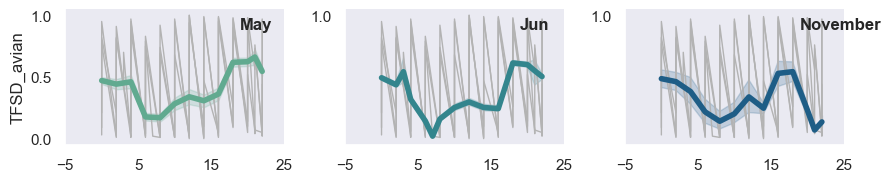

In [113]:
import seaborn as sns

sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="Hour", y="TFSD_avian", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df, x="Hour", y="TFSD_avian", units="Month",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "TFSD_avian")
g.tight_layout()

Text(0.5, 1.0, 'Human activity during the day')

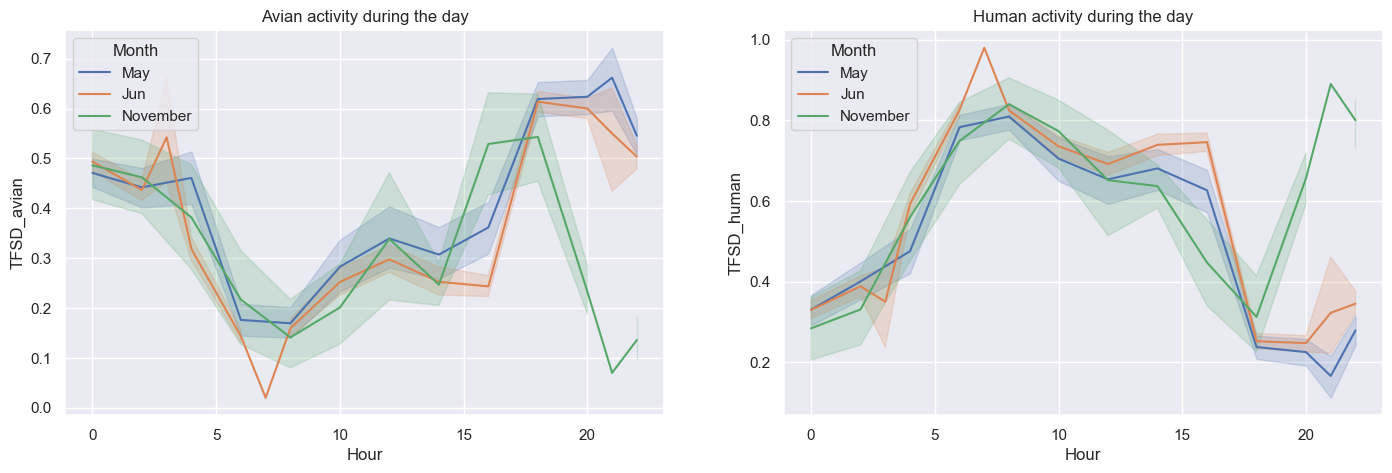

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17,5))
sns.lineplot(x="Hour", y="TFSD_avian",hue="Month",data=df, ax=ax1)
ax1.set_title('Avian activity during the day')
sns.lineplot(x="Hour", y="TFSD_human",hue="Month",data=df, ax=ax2)
ax2.set_title('Human activity during the day')